In [79]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from keras.optimizers import Adam

from keras.preprocessing.image import ImageDataGenerator

In [80]:
directory = r'ColorClassification'

# Create an ImageDataGenerator for training data with validation split and data augmentation
train_img_gen = ImageDataGenerator(
    rescale=1. / 255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load training and validation data without using 'subset' parameter
train_img_data = train_img_gen.flow_from_directory(
    directory=directory,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_img_data = train_img_gen.flow_from_directory(
    directory=directory,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

print(train_img_data.class_indices)


Found 87 images belonging to 9 classes.
Found 20 images belonging to 9 classes.
{'Black': 0, 'Blue': 1, 'Brown': 2, 'Green': 3, 'Violet': 4, 'White': 5, 'orange': 6, 'red': 7, 'yellow': 8}


In [81]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Conv2D, MaxPooling2D, Dense
from keras import regularizers

In [82]:
model = Sequential()

model.add(Conv2D(
    filters=128,
    kernel_size=(3, 3),
    activation="relu",
    input_shape=(150, 150, 3),
))
model.add(MaxPooling2D(
    pool_size=(2, 2)
))

model.add(Conv2D(
    filters=256,
    kernel_size=(3, 3),
    activation="relu",
))
model.add(MaxPooling2D(
    pool_size=(2, 2)
))

model.add(Conv2D(
    filters=256,
    kernel_size=(3, 3),
    activation="relu",
))
model.add(MaxPooling2D(
    pool_size=(2, 2)
))

model.add(Conv2D(
    filters=256,
    kernel_size=(3, 3),
    activation="relu",
))
model.add(MaxPooling2D(
    pool_size=(2, 2)
))

model.add(Conv2D(
    filters=256,
    kernel_size=(3, 3),
    activation="relu",
))
model.add(MaxPooling2D(
    pool_size=(2, 2)
))

# Flatten for classification
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(
    units=512,
    activation="relu",
))
# Adjust units in the output layer based on your number of classes
# Change the number of units in the output layer to match your dataset
model.add(Dense(
    units=9,  # Change this to the actual number of classes in your dataset
    activation="softmax",
))

model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    # Uncomment the line below and adjust the learning rate if needed
    # optimizer=Adam(lr=0.01),
    metrics=["accuracy"]
)

In [83]:
print("Number of samples in training dataset:", train_img_data.samples)
print("Number of samples in validation dataset:", validation_img_data.samples)


Number of samples in training dataset: 87
Number of samples in validation dataset: 20


In [84]:
import math

# Calculate steps_per_epoch based on the number of samples and batch size
steps_per_epoch = math.ceil(train_img_data.samples / train_img_data.batch_size)

# Calculate validation_steps in a similar way
validation_steps = math.ceil(validation_img_data.samples / validation_img_data.batch_size)


# Print values for debugging
print(f"Number of samples: {train_img_data.samples}")
print(f"Batch size: {train_img_data.batch_size}")
print(f"Calculated steps_per_epoch: {steps_per_epoch}")

# Use the calculated steps_per_epoch value in the model.fit call
hist = model.fit(
    train_img_data,
    epochs=40,
    steps_per_epoch=steps_per_epoch,
    validation_data=validation_img_data,
    validation_steps=validation_steps,
)


Number of samples: 87
Batch size: 32
Calculated steps_per_epoch: 3
Epoch 1/40
3/3 [==============================] - 9s 3s/step - loss: 2.2247 - accuracy: 0.1494 - val_loss: 2.1559 - val_accuracy: 0.1500
Epoch 2/40
3/3 [==============================] - 7s 2s/step - loss: 2.1563 - accuracy: 0.1609 - val_loss: 2.1248 - val_accuracy: 0.1500
Epoch 3/40
3/3 [==============================] - 7s 2s/step - loss: 2.1073 - accuracy: 0.1609 - val_loss: 2.0056 - val_accuracy: 0.1500
Epoch 4/40
3/3 [==============================] - 7s 2s/step - loss: 1.9417 - accuracy: 0.2414 - val_loss: 1.8048 - val_accuracy: 0.2500
Epoch 5/40
3/3 [==============================] - 7s 3s/step - loss: 1.8286 - accuracy: 0.2299 - val_loss: 1.6386 - val_accuracy: 0.3000
Epoch 6/40
3/3 [==============================] - 7s 2s/step - loss: 1.7592 - accuracy: 0.2644 - val_loss: 1.6489 - val_accuracy: 0.2500
Epoch 7/40
3/3 [==============================] - 7s 2s/step - loss: 1.6581 - accuracy: 0.2759 - val_loss: 1.47

In [85]:
# model.compile(
#     loss="categorical_crossentropy",
#     optimizer=Adam(lr=0.001),  # Experiment with different learning rates
#     metrics=["accuracy"]
# )

In [86]:
# Print out the last training accuracy value
train_accuracy = hist.history['accuracy']
print(f"Training Accuracy: {train_accuracy[-1] * 100:.2f}%")

# Check if 'val_accuracy' is present before attempting to access it
if 'val_accuracy' in hist.history:
    validation_accuracy = hist.history['val_accuracy']
    # Print out the last validation accuracy value
    print(f"Validation Accuracy: {validation_accuracy[-1] * 100:.2f}%")
else:
    print("Validation accuracy is not available.")


Training Accuracy: 95.40%
Validation Accuracy: 95.00%


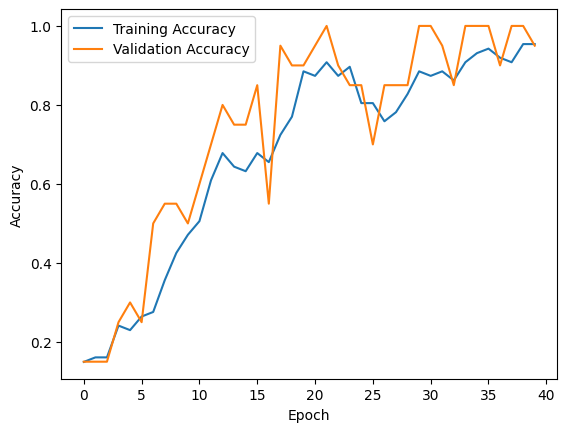

In [87]:
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [88]:
# Adjust the directory path for your test dataset
test_directory = r'testimg'

# Create an ImageDataGenerator for the test data (similar to how you did for training and validation)
test_img_gen = ImageDataGenerator(rescale=1. / 255)

# Load test data
test_img_data = test_img_gen.flow_from_directory(
    directory=test_directory,
    target_size=(150, 150),  # Adjust the target size as needed
    batch_size=32,  # Adjust the batch size as needed
    class_mode='categorical',
    shuffle=False  # Set shuffle to False to maintain the order of predictions
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_img_data)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Found 106 images belonging to 9 classes.


4/4 [==============================] - 3s 651ms/step - loss: 0.4247 - accuracy: 0.9057
Test Loss: 0.4246979057788849
Test Accuracy: 90.57%


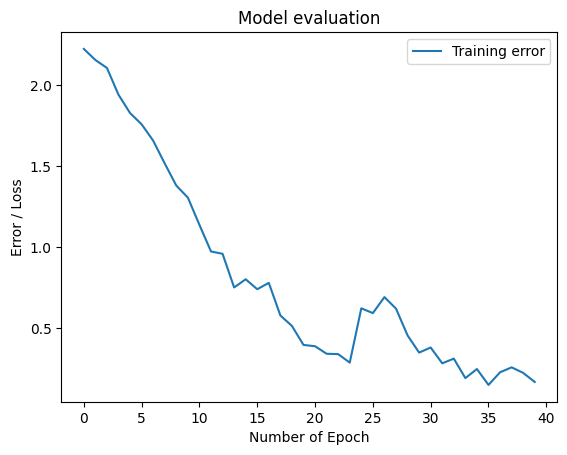

In [89]:
plt.plot(hist.history['loss'], label="Training error")

plt.title('Model evaluation')
plt.ylabel('Error / Loss')
plt.xlabel('Number of Epoch')
plt.legend()
plt.show()

In [90]:
model.save("colormodel.h5")